In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [2]:
df = pd.read_csv("data/testdata_000000000001.csv", index_col="clusterid")
#df = pd.concat([pd.read_csv(f,dtype=np.uint32,index_col="clusterid") for f in glob.glob('data/testdata_*.csv')])

In [5]:
df.head(10)

,out_degree,in_degree,total_degree,active_days,degree_per_active_day,total_amount_received,avg_amount_received,total_amount_sent,avg_amount_sent
clusterid,,,,,,,,,
255567734,52,15,67,337.0,0.154303,7.361487e+06,1.415671e+05,3.811353e+07,2.540902e+06
5012618,18,8,26,243.0,0.074074,1.363335e+08,7.574081e+06,4.432845e+07,5.541057e+06
548771402,7,7,14,41.0,0.170732,8.327060e+08,1.189580e+08,1.182520e+09,1.689315e+08
2273514,9,4,13,1.0,9.000000,1.464441e+10,1.627157e+09,2.367896e+10,5.919740e+09
150876499,61,87,148,143.0,0.426573,2.440326e+08,4.000535e+06,2.615523e+08,3.006348e+06
8818201,33,1,34,1.0,33.000000,1.021893e+08,3.096645e+06,1.335323e+09,1.335323e+09
291105629,8,7,15,20.0,0.400000,7.707322e+06,9.634152e+05,3.291700e+06,4.702429e+05
489552081,7,7,14,33.0,0.212121,1.745488e+06,2.493554e+05,1.578640e+06,2.255200e+05
32101057,11,4,15,5.0,2.200000,1.845030e+05,1.677300e+04,4.080000e+05,1.020000e+05


In [18]:
df[df.isnull().any(axis=1)]

,out_degree,in_degree,total_degree,active_days,degree_per_active_day,total_amount_received,avg_amount_received,total_amount_sent,avg_amount_sent
clusterid,,,,,,,,,
733596447,0,77,77,1.0,0.0,NaN,NaN,5.000400e+09,6.494026e+07
1347790,65,0,65,NaN,NaN,2622352.0,4.034388e+04,NaN,NaN
587347991,12,0,12,NaN,NaN,8805838.0,7.338198e+05,NaN,NaN
430668255,84,0,84,NaN,NaN,808722215.0,9.627645e+06,NaN,NaN
215527846,73,0,73,NaN,NaN,513164175.0,7.029646e+06,NaN,NaN
...,...,...,...,...,...,...,...,...,...
809789214,6,0,6,NaN,NaN,141723692.0,2.362062e+07,NaN,NaN
723557619,6,0,6,NaN,NaN,5087183.0,8.478638e+05,NaN,NaN
372683746,6,0,6,NaN,NaN,1614379.0,2.690632e+05,NaN,NaN


In [6]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4608827 entries, 255567734 to 88206717
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   out_degree             4608827 non-null  int64  
 1   in_degree              4608827 non-null  int64  
 2   total_degree           4608827 non-null  int64  
 3   active_days            4608827 non-null  float64
 4   degree_per_active_day  4608827 non-null  float64
 5   total_amount_received  4608827 non-null  float64
 6   avg_amount_received    4608827 non-null  float64
 7   total_amount_sent      4608827 non-null  float64
 8   avg_amount_sent        4608827 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 351.6 MB


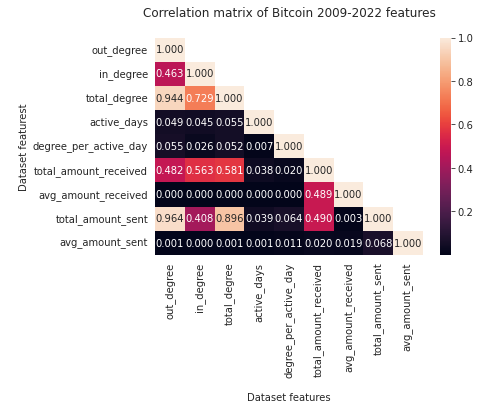

In [7]:
corr = df.corr().abs()

hm = sns.heatmap(corr, annot = True, fmt="0.3f",  mask = ~np.tril(np.ones(corr.shape)).astype(bool))

hm.set(xlabel='\nDataset features', ylabel='\nDataset featurest', title = "Correlation matrix of Bitcoin 2009-2022 features\n")

plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Correlation >=0.8 can 'confuse the model' and were extracted
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.8)]
print(f"Removing strong correlated columns: {to_drop}")

df.drop(columns=to_drop, axis=1,inplace=True)


#df[df.columns] = StandardScaler().fit_transform(df[df.columns])

print(df.head())
print(df.info(show_counts=True))


Removing strong correlated columns: ['total_degree', 'total_amount_sent']
           out_degree  in_degree  active_days  degree_per_active_day  \
clusterid                                                              
255567734          52         15        337.0               0.154303   
5012618            18          8        243.0               0.074074   
548771402           7          7         41.0               0.170732   
2273514             9          4          1.0               9.000000   
150876499          61         87        143.0               0.426573   

           total_amount_received  avg_amount_received  avg_amount_sent  
clusterid                                                               
255567734           7.361487e+06         1.415671e+05     2.540902e+06  
5012618             1.363335e+08         7.574081e+06     5.541057e+06  
548771402           8.327060e+08         1.189580e+08     1.689315e+08  
2273514             1.464441e+10         1.627157e+09   

In [9]:
sample = df.sample(10000,random_state=42)

In [14]:
# #############################################################################
# Compute DBSCAN
from sklearn import metrics
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=2).fit(sample)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

sample["labels"] = labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
#print(
#    "Adjusted Mutual Information: %0.3f"
#    % metrics.adjusted_mutual_info_score(labels_true, labels)
#)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(sample, labels))

Estimated number of clusters: 27
Estimated number of noise points: 9923
Silhouette Coefficient: -0.898


In [15]:
sample.labels.value_counts()

-1     9923
 24       6
 14       6
 7        4
 13       4
 3        4
 1        4
 2        4
 9        3
 22       3
 12       3
 20       3
 17       3
 4        2
 18       2
 25       2
 23       2
 21       2
 19       2
 15       2
 16       2
 5        2
 0        2
 11       2
 10       2
 8        2
 6        2
 26       2
Name: labels, dtype: int64

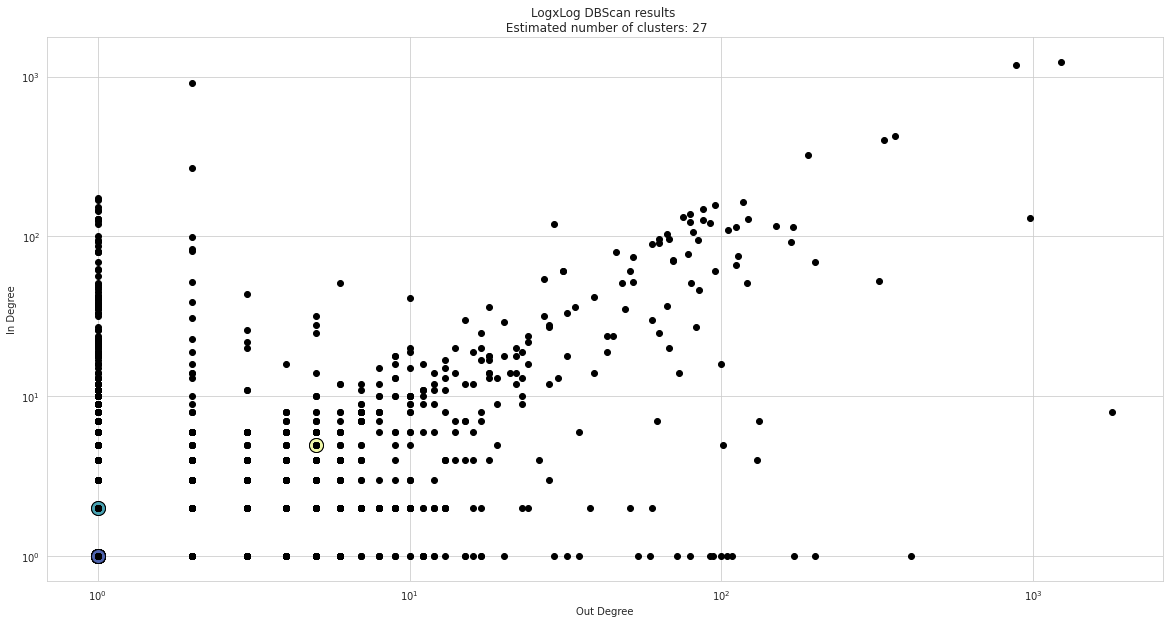

In [16]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

fig = plt.figure(figsize=(20,10))
ax = plt.gca()

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = sample[class_member_mask & core_samples_mask]
    plt.plot(xy.out_degree,xy.in_degree,"o",markerfacecolor=tuple(col),markeredgecolor="k",markersize=14)

    xy = sample[class_member_mask & ~core_samples_mask]
    plt.plot(xy.out_degree, xy.in_degree,"o",markerfacecolor=tuple(col),markeredgecolor="k",markersize=6)

ax.set_yscale('log')
ax.set_xscale('log')

plt.title("LogxLog DBScan results \n Estimated number of clusters: %d" % n_clusters_)

plt.xlabel("Out Degree") # X-axis label
plt.ylabel("In Degree") # Y-axis label
plt.show()

In [13]:
sample.head()

,out_degree,in_degree,active_days,degree_per_active_day,total_amount_received,avg_amount_received,avg_amount_sent,labels
clusterid,,,,,,,,
21118374,2,2,1.0,2.0,9.787202e+06,4893601.0,4.873601e+06,0
393443820,1,2,1.0,1.0,1.424077e+08,142407733.0,7.117920e+07,1
297991815,1,2,1.0,1.0,6.218124e+07,62181245.0,3.108836e+07,2
6413513,5,1,1.0,5.0,1.106806e+09,221361163.0,1.048547e+09,3
91703797,1,0,0.0,0.0,2.877600e+07,28776000.0,0.000000e+00,4


In [ ]:
sample.labels.to_csv("clustering_results.csv",chunksize=4608828)